In [1]:
import cv2
import numpy as np
import time as t
from matplotlib import pyplot as plt
%matplotlib inline

from pprint import pprint

In [2]:
def show(img, title=''):
    plt.title(title)
    plt.imshow(img, cmap="Greys_r")
    plt.show()

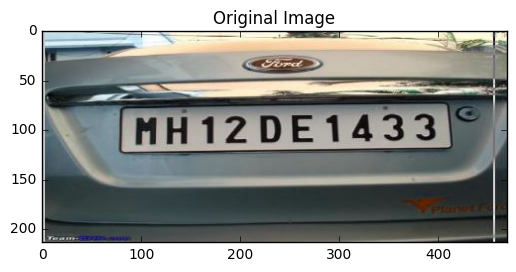

In [4]:
img = cv2.imread('/home/dorado/work/opencv/lpr/images/2.jpg', 1)
show(img, 'Original Image')

In [711]:
print "Height:\t%i pixels\nWidth:\t%i pixels\nChannels:\t%i" % img.shape
print "pixel at (0,0) [B,G,R]:\t[%i,%i,%i]" % tuple(img[0,0,:])
print "data-type: %s " % img.dtype
print len(img), len(img[0]), len(img[0][0])

Height:	214 pixels
Width:	470 pixels
Channels:	3
pixel at (0,0) [B,G,R]:	[221,205,206]
data-type: uint8 
214 470 3


#### Resizing image

Height:	218 pixels
Width:	480 pixels
Channels:	3


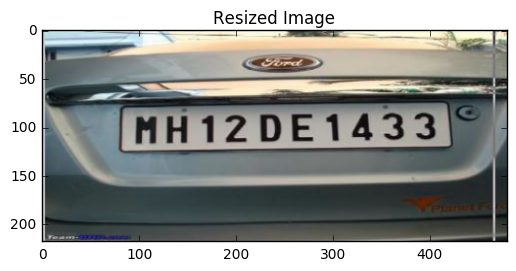

In [712]:
img = cv2.resize(img, (480, img.shape[0] * 480 / img.shape[1]))
print "Height:\t%i pixels\nWidth:\t%i pixels\nChannels:\t%i" % img.shape
show(img, 'Resized Image')
# print(img)

#### Convert to Grayscale

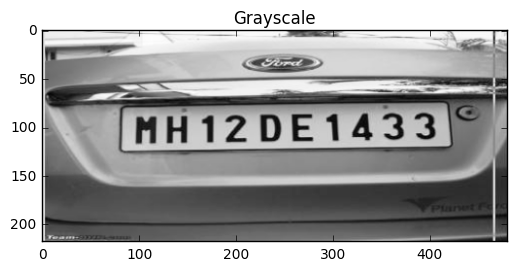

In [713]:
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gimg, 'Grayscale')
# print(gimg)
# cv2.imwrite('gray_image.png', gimg)
# print len(gimg[0][0])
# print img[0][0][:]

#### Median Filtering

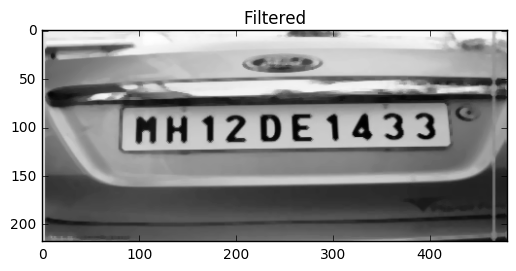

In [714]:
mimg = cv2.medianBlur(gimg, 5)
show(mimg, 'Filtered')
gimg = mimg

#### Morphological Gradient & Convolution

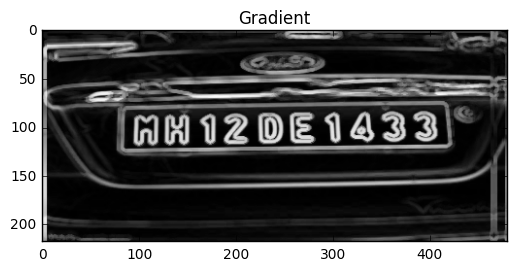

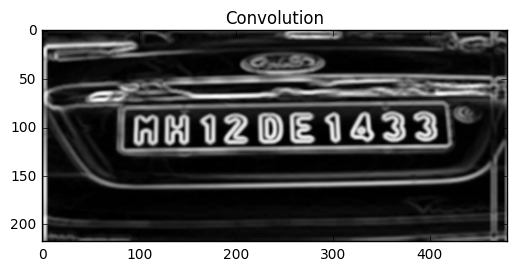

In [715]:
# difference between dilation and erosion of an image
ksize = 5
# kernel = np.ones((ksize, ksize),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
# print kernel
grimg = cv2.morphologyEx(gimg, cv2.MORPH_GRADIENT, kernel)
show(grimg, 'Gradient')

# convolution
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
cimg = cv2.filter2D(grimg, -1, kernel)
show(cimg, 'Convolution')

#### Thresholding

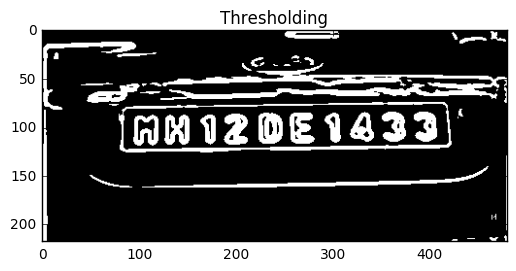

In [716]:
def thold(img):
    gimgmax = img.max(axis=1)[0]
    ret, thresh = cv2.threshold(img, gimgmax * 1 / 2, gimgmax, cv2.THRESH_BINARY)
    return thresh
    
thresh = thold(cimg)
show(thresh, 'Thresholding')

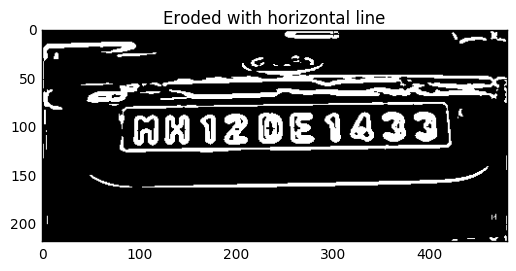

In [734]:
# erosion by line structuring element
for i in range(1, 40, 10):
    strel_line = np.ones(i);
    e_line_img = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, strel_line)
#     show(thresh - e_line_img)
sgimg = thresh - e_line_img
show(sgimg, 'Eroded with horizontal line')
# show(sgimg)

#### Opening (Hole Filling)

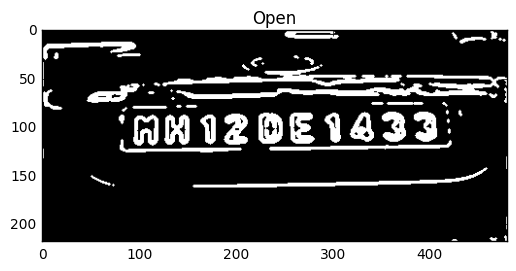

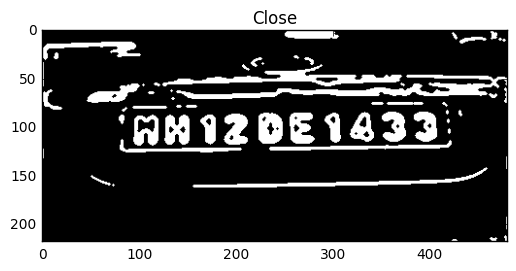

In [742]:
# k_size = 5
# kernel = np.ones((k_size, k_size), np.uint8)
# close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# show(close)

ksize = 3
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize, ksize))
openi = cv2.morphologyEx(sgimg, cv2.MORPH_OPEN, kernel)
show(openi, 'Open')
close = cv2.morphologyEx(openi, cv2.MORPH_CLOSE, kernel)
show(close, 'Close')

### Flood Fill

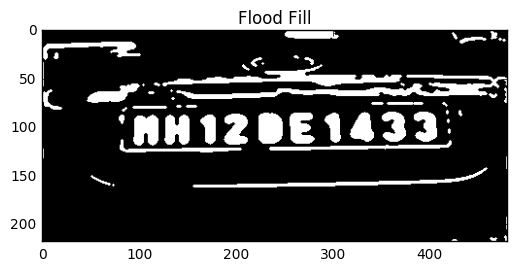

In [743]:
ff = close.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = close.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
# Floodfill from point (0, 0)
cv2.floodFill(ff, mask, (0,0), 255);
# Invert floodfilled image
ffi = cv2.bitwise_not(ff)
# Combine the two images to get the foreground.
ffr = close | ffi
show(ffr, 'Flood Fill')

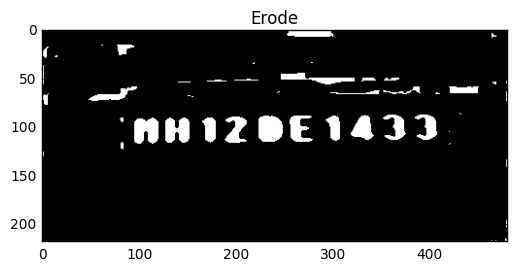

In [744]:
strel_line = np.ones((6, 1));
# print strel_line
eimg = cv2.morphologyEx(ffr, cv2.MORPH_ERODE, strel_line)
show(eimg, 'Erode')

In [745]:
def bad_contour(c):
    x,y,w,h = cv2.boundingRect(c)
    if (w * h <= 100):
        print x, y, w, h
        return True
    return False

def bwareaopen(img, c):
    x,y,w,h = cv2.boundingRect(c)
    if (w * h <= 256):
#         print x, y, w, h
#         print "Before\n", img[y:y+h, x:x+w]
        img[y:y+h, x:x+w] = 0
#         print "After\n", img[y:y+h, x:x+w]
        return (True, img)
    return (False, img)

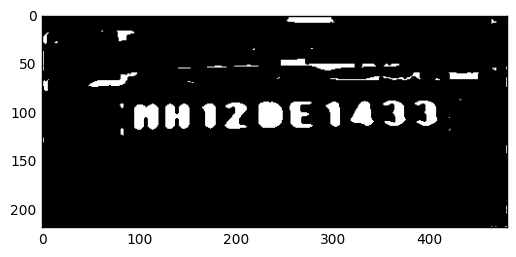

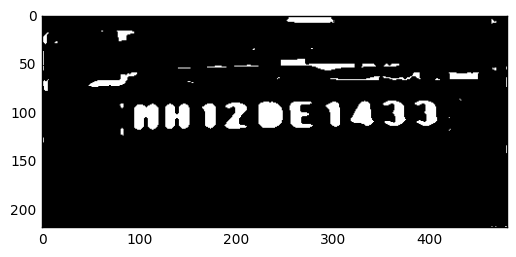

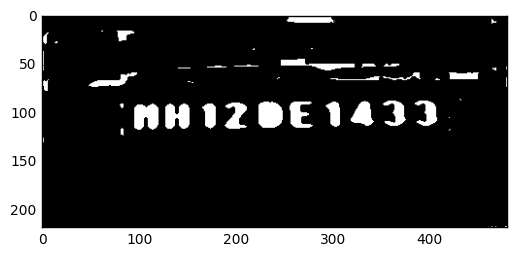

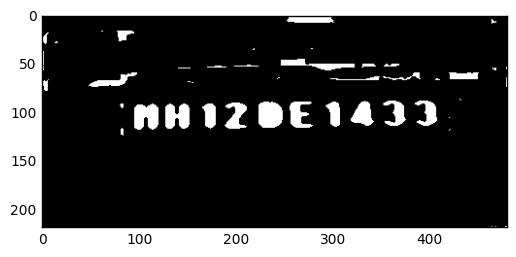

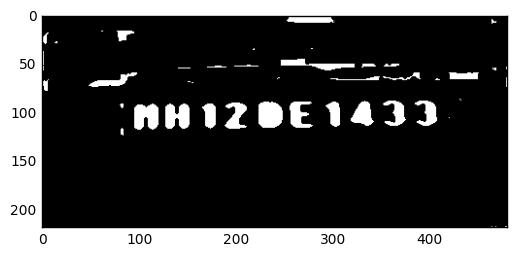

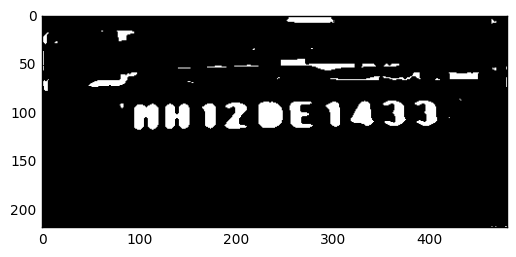

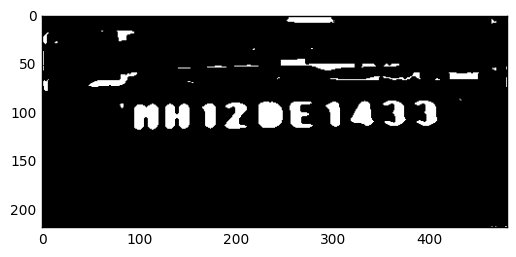

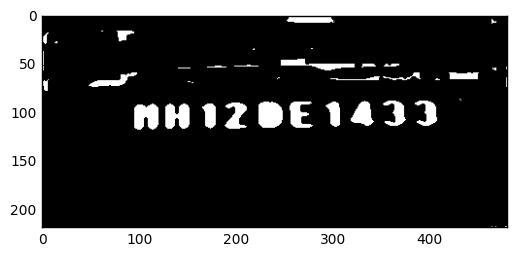

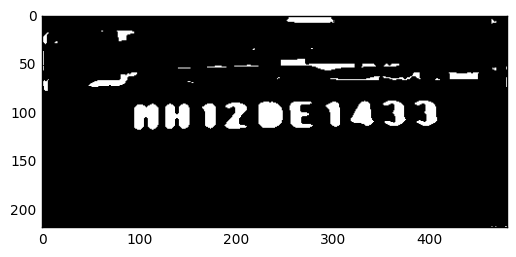

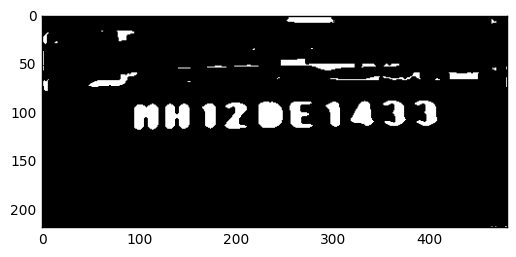

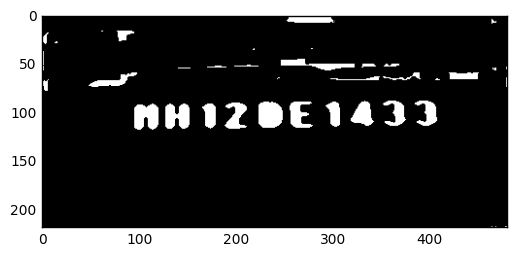

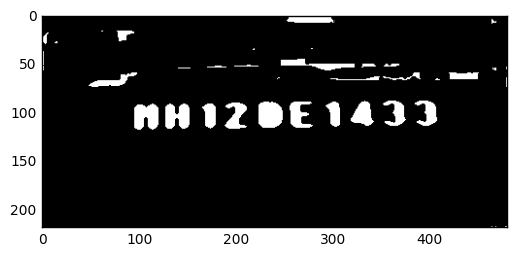

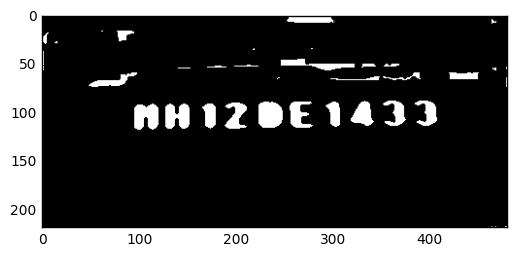

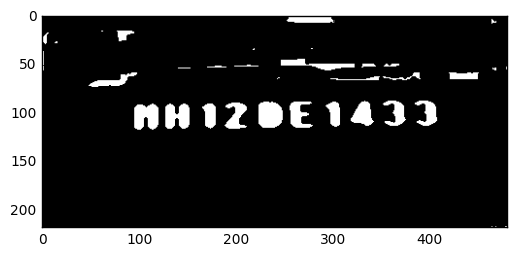

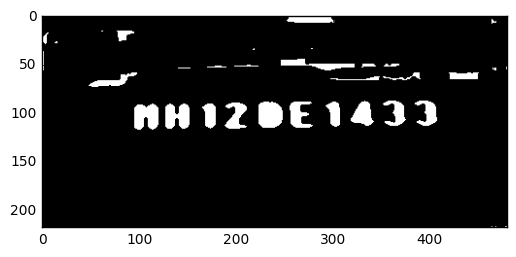

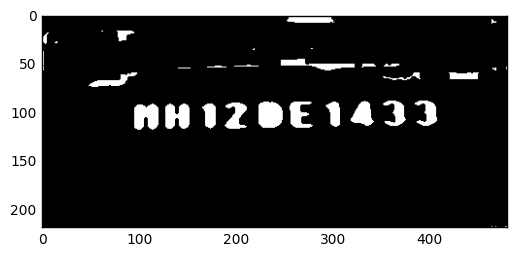

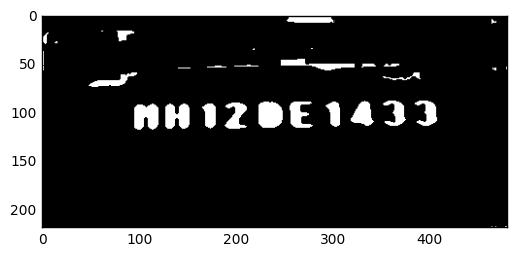

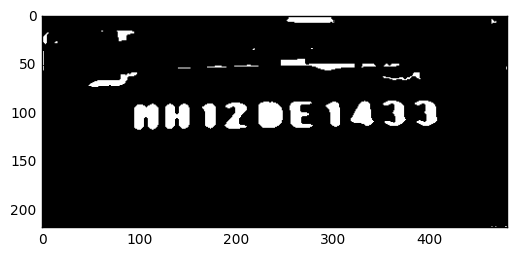

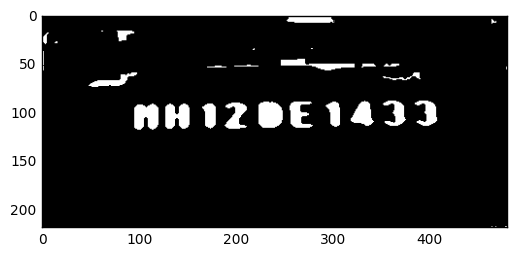

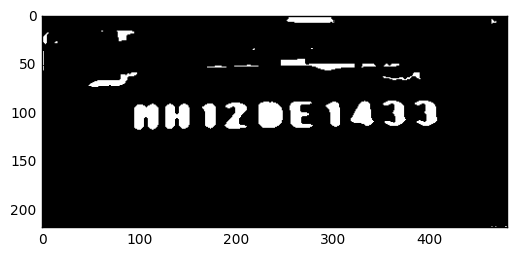

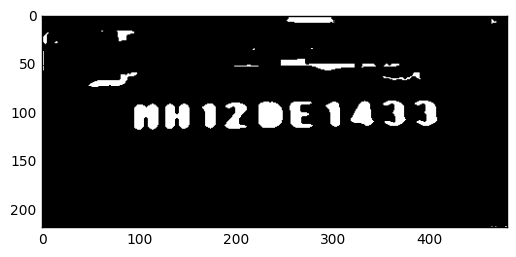

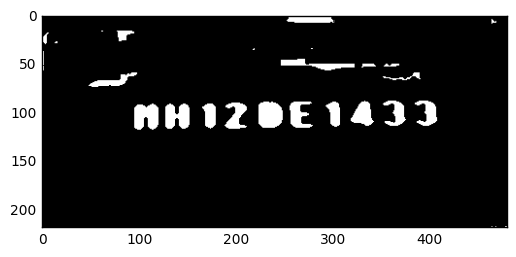

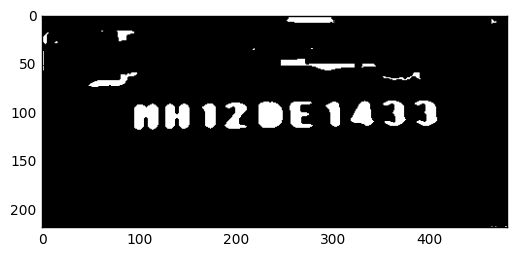

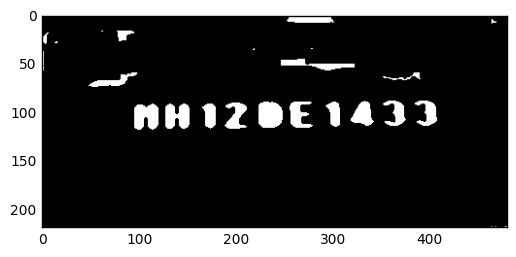

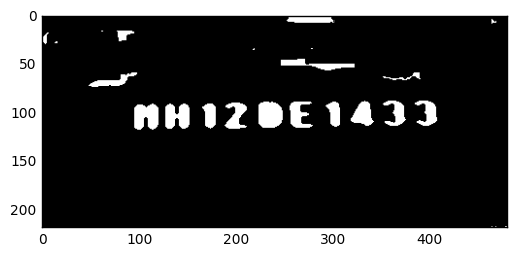

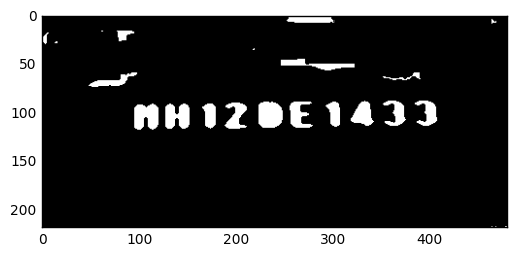

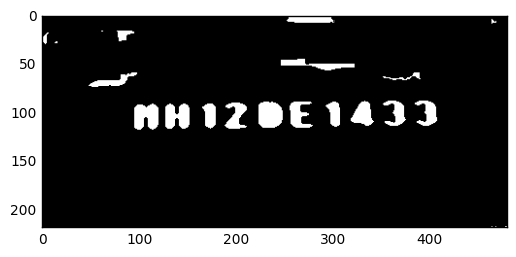

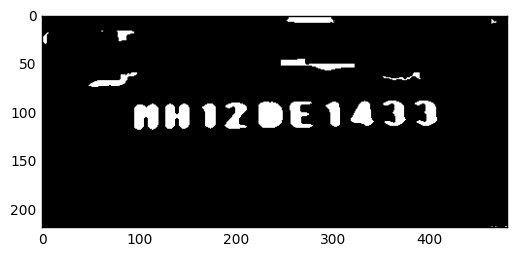

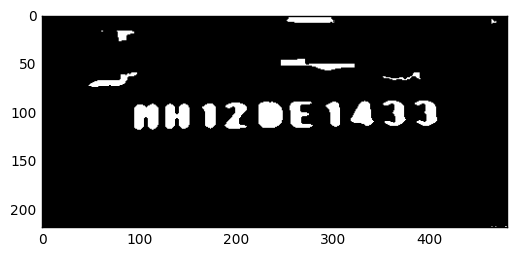

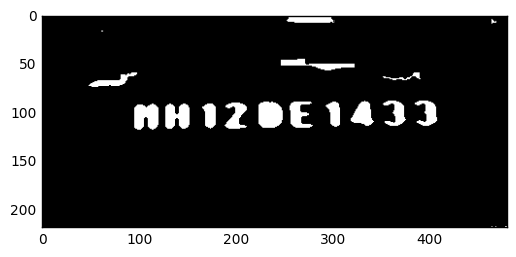

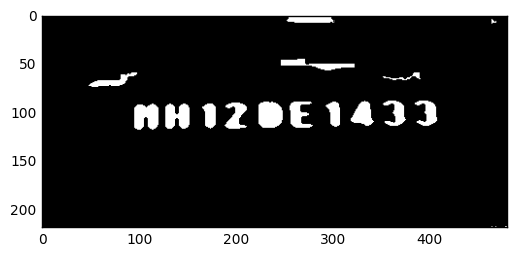

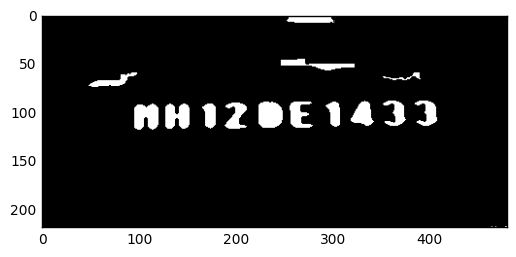

In [746]:
elic = np.array(eimg)
contours, hierarchy = cv2.findContours(elic, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    opened, close = bwareaopen(eimg, c)
    if opened:
#         x,y,w,h = cv2.boundingRect(c)
#         cv2.rectangle(gimg, (x,y),(x+w,y+h),(0,255,0), 2)
        show(close)

14


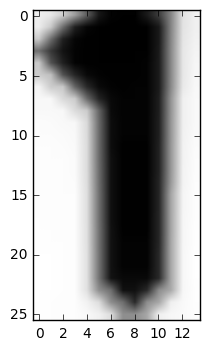

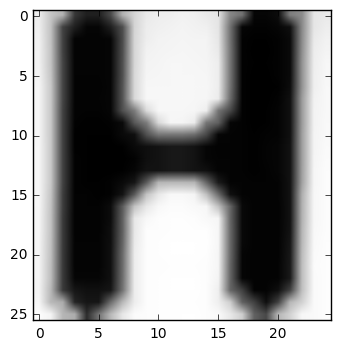

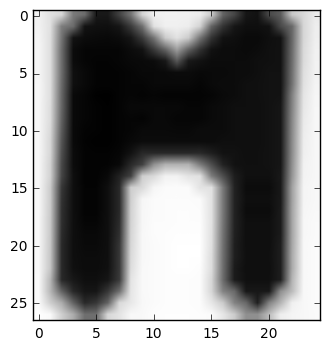

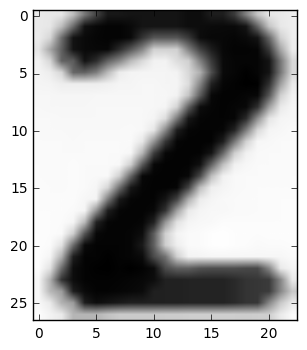

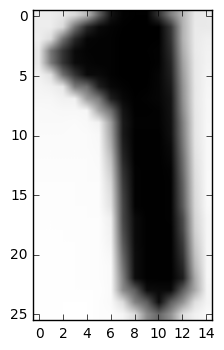

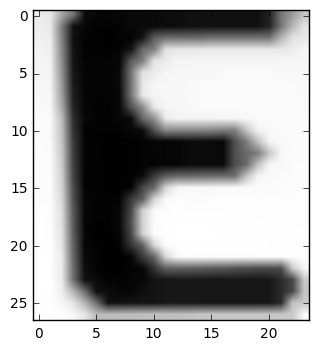

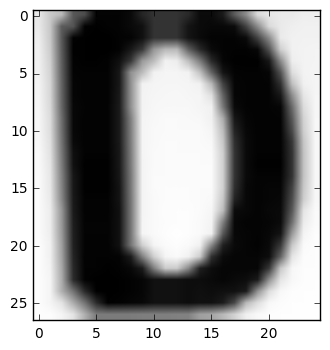

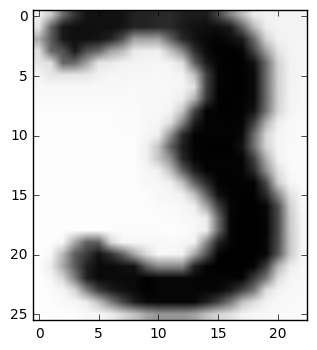

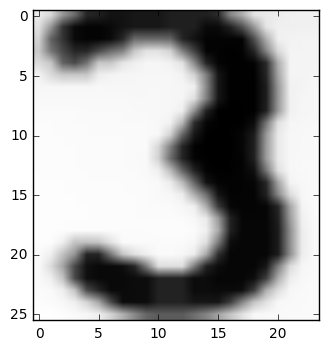

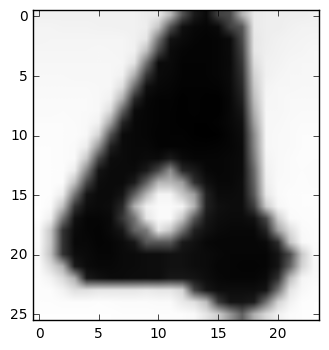

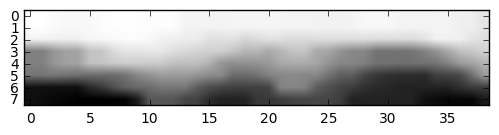

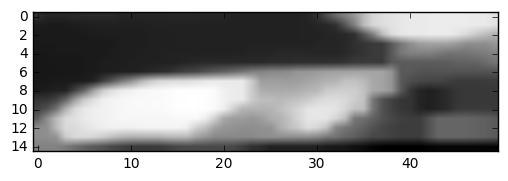

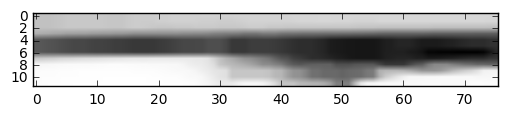

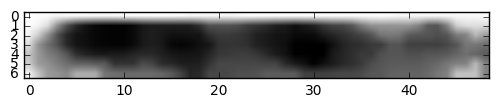

In [747]:
e_copy = np.array(eimg)
contours, hierarchy = cv2.findContours(e_copy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print len(contours)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
#     cv2.rectangle(gimg, (x,y),(x+w,y+h),(0,255,0), 2)
    show(gimg[y:y+h, x:x+w])
#     show(gimg)